In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
imgatt = pd.read_csv("image_attribute_labels.txt",sep='\s+', header=None,error_bad_lines=False, warn_bad_lines=False, usecols=[0,1,2], names=['imgid', 'attid', 'present'])

Saving image_attribute_labels.txt to image_attribute_labels.txt


In [ ]:
imgatt.head()

,imgid,attid,present
0,1,1,0
1,1,2,0
2,1,3,0
3,1,4,0
4,1,5,1


In [ ]:
imgatt.shape

(3677856, 3)

In [ ]:
imgatt2 = imgatt.pivot(index='imgid', columns='attid', values='present')

In [ ]:
imgatt2.head()

attid,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312
imgid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
5,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
imgatt2.shape

(11788, 312)

In [ ]:
from google.colab import files
uploaded = files.upload()
imglabels = pd.read_csv("image_class_labels.txt",sep=' ', header=None, names=['imgid', 'label'])

imglabels = imglabels.set_index('imgid')

Saving image_class_labels.txt to image_class_labels.txt


In [ ]:
imglabels.head()

,label
imgid,
1,1
2,1
3,1
4,1
5,1


In [ ]:
imglabels.shape

(11788, 1)

In [ ]:
df = imgatt2.join(imglabels)
df = df.sample(frac=1)

In [ ]:
df_att = df.iloc[:, :312]
df_label = df.iloc[:, 312:]

In [ ]:
df_att.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312
imgid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7075,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2781,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5600,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
10958,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
9133,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_train_att = df_att[:8000]
df_train_label = df_label[:8000]
df_test_att = df_att[8000:]
df_test_label = df_label[8000:]

df_train_label = df_train_label['label']
df_test_label = df_test_label['label']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_features=50, random_state=0, n_estimators=100)

In [ ]:
clf.fit(df_train_att, df_train_label)

RandomForestClassifier(max_features=50, random_state=0)

In [ ]:
print(clf.predict(df_train_att.head()))

[121  49  96 186 156]


In [ ]:
clf.score(df_test_att, df_test_label)

0.442713833157339


Membuat confusion matrix untuk data

In [ ]:
from sklearn.metrics import confusion_matrix
pred_labels = clf.predict(df_test_att)
cm = confusion_matrix(df_test_label, pred_labels)

In [ ]:
cm

array([[ 6,  0,  5, ...,  0,  0,  0],
       [ 0, 13,  1, ...,  0,  0,  0],
       [ 3,  0,  4, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  4,  0,  0],
       [ 0,  0,  0, ...,  0,  8,  0],
       [ 0,  0,  0, ...,  0,  0, 15]])

In [ ]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalisasi confusion matrix")
  else:
    print("confusion matrix, tanpa normalisasi")

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=99)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.


    plt.tight_layout()
    plt.ylabel('label benar')
    plt.xlabel('Label prediksi')

In [ ]:
from google.colab import files
uploaded = files.upload()
birds = pd.read_csv("classes.txt", sep='\s+', header=None, usecols=[1], names=['birdname'])
birds = birds['birdname']
birds

Saving classes.txt to classes.txt


0      001.Black_footed_Albatross
1            002.Laysan_Albatross
2             003.Sooty_Albatross
3           004.Groove_billed_Ani
4              005.Crested_Auklet
                  ...            
195                196.House_Wren
196                197.Marsh_Wren
197                 198.Rock_Wren
198               199.Winter_Wren
199       200.Common_Yellowthroat
Name: birdname, Length: 200, dtype: object

In [ ]:
import numpy as np
np.set_printoptions(precision=2)
plt.figure(figsize=(60,60), dpi=300)
plot_confusion_matrix(cm, classes=birds, normalize=True)
plt.show()

Normalisasi confusion matrix


<Figure size 18000x18000 with 0 Axes>

In [ ]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier()
clftree.fit(df_train_att, df_train_label)
clftree.score(df_test_att, df_test_label)

0.2655755015839493

In [ ]:
from sklearn import svm
clfsvm = svm.SVC()
clfsvm.fit(df_train_att, df_train_label)
clfsvm.score(df_test_att, df_test_label)

0.4659450897571278

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, df_train_att, df_train_label, cv=5)
print("akurat: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

akurat: 0.44 (+/- 0.03)


In [ ]:
scorestree = cross_val_score(clftree, df_train_att, df_train_label, cv=5)
print("akurat: %0.2f (+/- %0.2f)" % (scorestree.mean(), scorestree.std() * 2))

akurat: 0.26 (+/- 0.02)


In [ ]:
scoressvm = cross_val_score(clfsvm, df_train_att, df_train_label, cv=5)
print("akurat: %0.2f (+/- %0.2f)" % (scoressvm.mean(), scoressvm.std() * 2))

akurat: 0.48 (+/- 0.02)


In [ ]:
max_features_opts = range(5, 50, 5)
n_estimators_opts = range(10, 200, 20)
rf_params = np.empty((len(max_features_opts)*len(n_estimators_opts),4), float)
i = 0
for max_features in max_features_opts:
  for n_estimators in n_estimators_opts:
    clf = RandomForestClassifier(max_features=max_features, n_estimators=n_estimators)
    scores = cross_val_score(clf, df_train_att, df_train_label, cv=5)
    rf_params[i,0] = max_features
    rf_params[i,1] = n_estimators
    rf_params[i,2] = scores.mean()
    rf_params[i,3] = scores.std() * 2
    i += 1
    print("max feature: %d, num estimators: %d, akurat: %0.2f (+/- %0.2f)" % (max_features, n_estimators, scores.mean(), scores.std() *2 ))

max feature: 5, num estimators: 10, akurat: 0.26 (+/- 0.01)
max feature: 5, num estimators: 30, akurat: 0.36 (+/- 0.02)
max feature: 5, num estimators: 50, akurat: 0.39 (+/- 0.01)
max feature: 5, num estimators: 70, akurat: 0.41 (+/- 0.02)
max feature: 5, num estimators: 90, akurat: 0.43 (+/- 0.02)
max feature: 5, num estimators: 110, akurat: 0.43 (+/- 0.02)
max feature: 5, num estimators: 130, akurat: 0.44 (+/- 0.02)
max feature: 5, num estimators: 150, akurat: 0.44 (+/- 0.02)
max feature: 5, num estimators: 170, akurat: 0.44 (+/- 0.02)
max feature: 5, num estimators: 190, akurat: 0.45 (+/- 0.02)
max feature: 10, num estimators: 10, akurat: 0.28 (+/- 0.02)
max feature: 10, num estimators: 30, akurat: 0.37 (+/- 0.02)
max feature: 10, num estimators: 50, akurat: 0.41 (+/- 0.01)
max feature: 10, num estimators: 70, akurat: 0.43 (+/- 0.01)
max feature: 10, num estimators: 90, akurat: 0.43 (+/- 0.02)
max feature: 10, num estimators: 110, akurat: 0.44 (+/- 0.02)
max feature: 10, num estimat

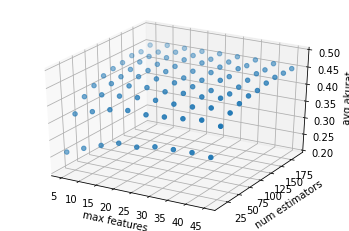

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')
x = rf_params[:,0]
y = rf_params[:,1]
z = rf_params[:,2]
ax.scatter(x, y, z)
ax.set_zlim(0.2, 0.5)
ax.set_xlabel('max features')
ax.set_ylabel('num estimators')
ax.set_zlabel('avg akurat')
plt.show()